In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. import weather data set 

data reference : daily weather data set in Chicago from 2001.01.01. ~ 2018.12.31. https://www.visualcrossing.com/weather/weather-data-services



In [173]:
weather = pd.read_csv('/Users/kimgagyeong/chicago_weather_2001_2018.csv',low_memory=False)
weather = weather[['datetime', 'temp', 'feelslike', 'humidity', 'precip',  'windspeed', 'cloudcover', 'visibility', 'solarenergy']]
weather.set_index('datetime',drop=True,inplace=True) # set index as datetime
weather.index = pd.to_datetime(weather.index)

weather

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy
datetime,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN
...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8


In [174]:
weather.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy'],
      dtype='object')

## 2. import crime data set
crime data set in Chicago from 2001.01.01. to present https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

In [175]:
crime = pd.read_csv('/Users/kimgagyeong/Crimes_-_2001_to_Present.csv',low_memory=False, index_col=False)
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677062,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,11/12/2022 03:46:21 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7677063,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,11/12/2022 03:46:21 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7677064,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,11/12/2022 03:46:21 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7677065,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,11/12/2022 03:46:21 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [176]:
crime['Datetime'] = pd.to_datetime(crime['Date'],format="%m/%d/%Y %I:%M:%S %p")
crime['Date'] = crime['Datetime'].apply(lambda x:x.date())
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
0,10224738,HY411648,2015-09-05,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05 13:30:00
1,10224739,HY411615,2015-09-04,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04 11:30:00
2,11646166,JC213529,2018-09-01,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00
3,10224740,HY411595,2015-09-05,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05 12:45:00
4,10224741,HY411610,2015-09-05,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677062,12847575,JF420478,2022-09-01,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,6.0,26,1172497.0,1919410.0,2022,11/12/2022 03:46:21 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)",2022-09-01 05:00:00
7677063,12847801,JF420319,2022-07-08,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,49.0,11,1179966.0,1828818.0,2022,11/12/2022 03:46:21 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)",2022-07-08 00:00:00
7677064,12847324,JF420102,2022-09-27,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,43.0,06,1193181.0,1859005.0,2022,11/12/2022 03:46:21 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)",2022-09-27 11:00:00
7677065,12847570,JF420427,2022-09-03,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,11.0,18,1140553.0,1933418.0,2022,11/12/2022 03:46:21 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)",2022-09-03 10:25:00


## 3. crime data visualization

In [177]:
crime['weekday'] = crime['Datetime'].dt.day_name()
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,weekday
0,10224738,HY411648,2015-09-05,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",2015-09-05 13:30:00,Saturday
1,10224739,HY411615,2015-09-04,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",2015-09-04 11:30:00,Friday
2,11646166,JC213529,2018-09-01,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00,Saturday
3,10224740,HY411595,2015-09-05,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",2015-09-05 12:45:00,Saturday
4,10224741,HY411610,2015-09-05,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",2015-09-05 13:00:00,Saturday


Text(6.800000000000011, 0.5, 'Count')

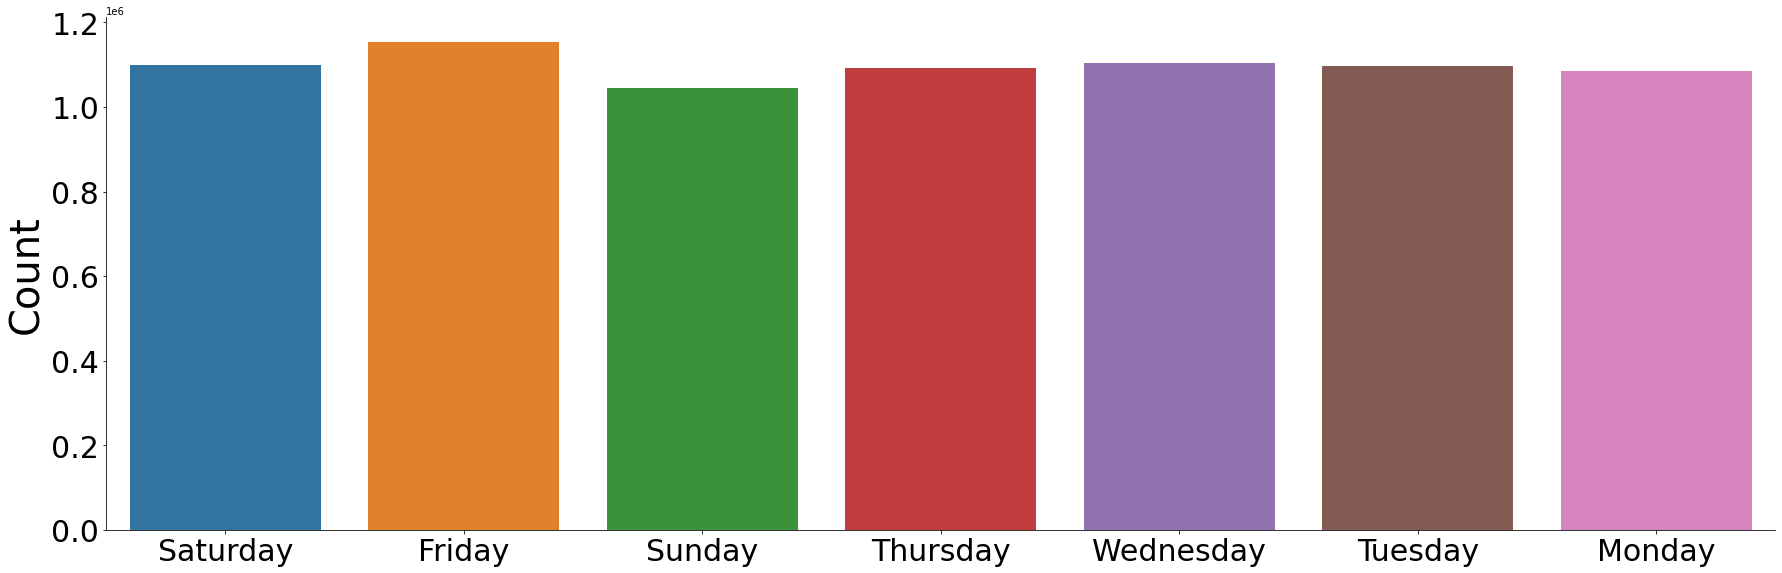

In [178]:
import seaborn as sns

# Crimes by day of the week
sns.catplot(x='weekday',
           kind='count',
            height=8, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

Text(-15.449999999999989, 0.5, 'Count')

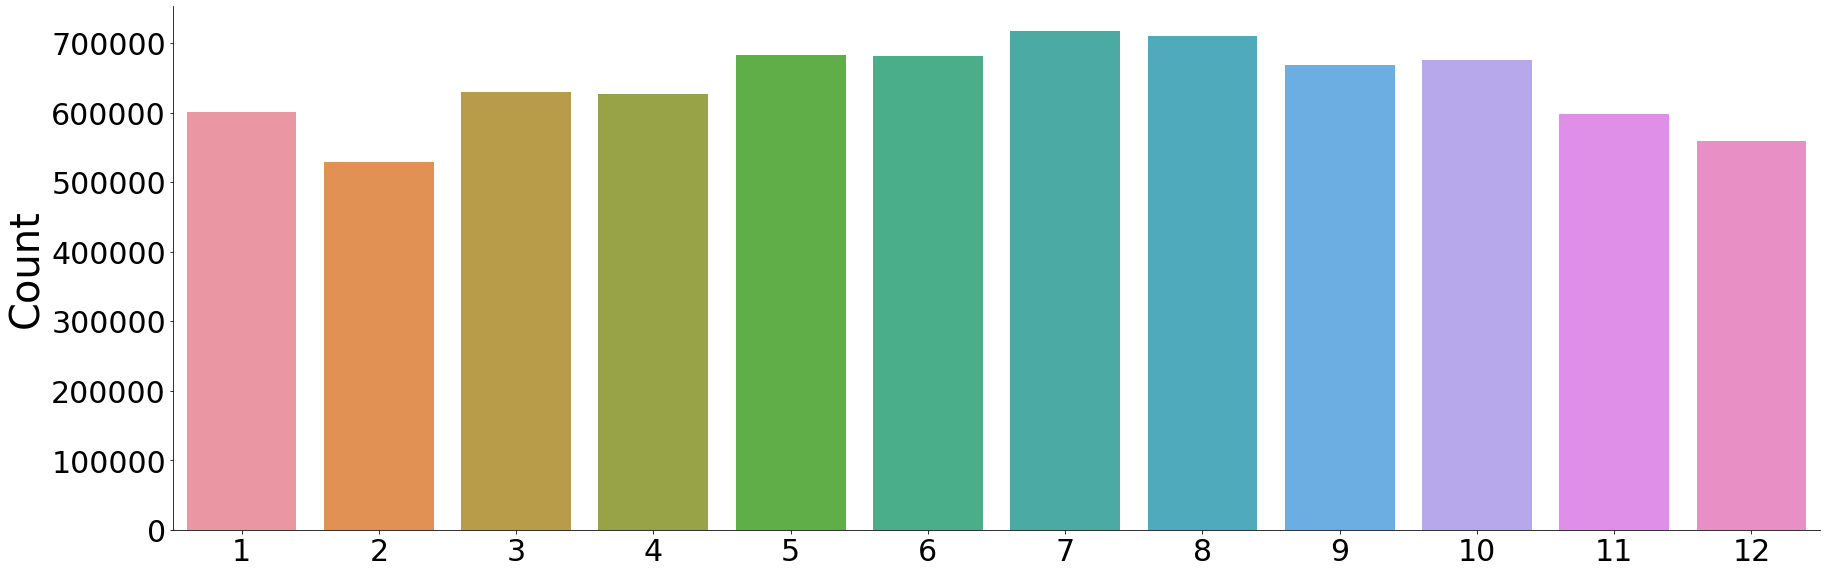

In [179]:
# Crimes by month of year
crime['month']=crime['Datetime'].dt.month
sns.catplot(x='month',
           kind='count',
            height=8, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

Text(-15.449999999999996, 0.5, 'Count')

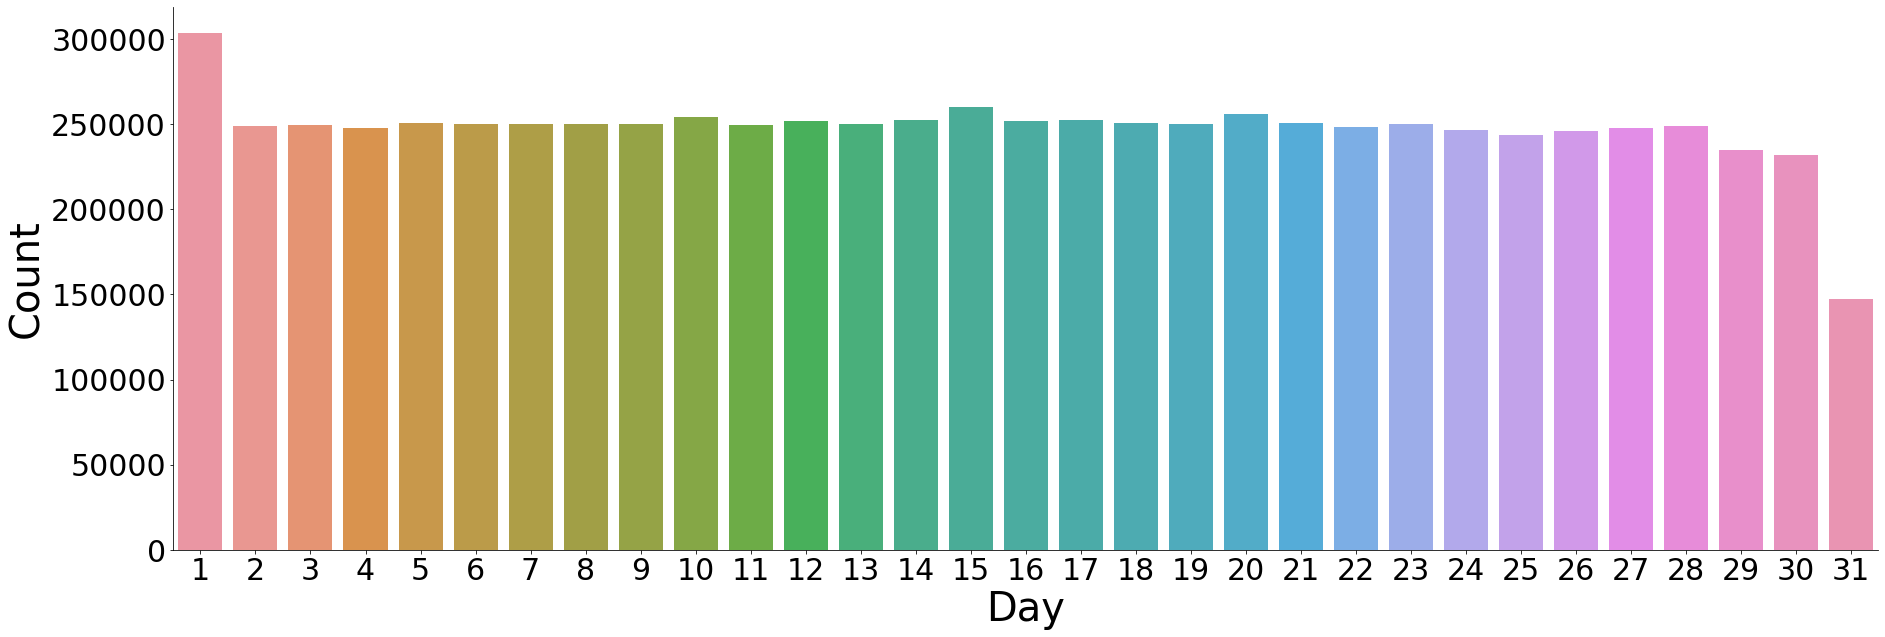

In [180]:
# Crimes by day
crime['day']=crime['Datetime'].dt.day
sns.catplot(x='day',
           kind='count',
            height=8.27, 
            aspect=3,
           data=crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Day', fontsize=40)
plt.ylabel('Count', fontsize=40)


## 4. merge crime data and weather data 

In [181]:
crime['Primary Type'].value_counts()

THEFT                                1619586
BATTERY                              1406160
CRIMINAL DAMAGE                       875325
NARCOTICS                             744549
ASSAULT                               498654
OTHER OFFENSE                         477125
BURGLARY                              421175
MOTOR VEHICLE THEFT                   362235
DECEPTIVE PRACTICE                    336587
ROBBERY                               288349
CRIMINAL TRESPASS                     212364
WEAPONS VIOLATION                     102966
PROSTITUTION                           69735
OFFENSE INVOLVING CHILDREN             54742
PUBLIC PEACE VIOLATION                 52002
SEX OFFENSE                            30109
CRIM SEXUAL ASSAULT                    27699
INTERFERENCE WITH PUBLIC OFFICER       18168
LIQUOR LAW VIOLATION                   14826
GAMBLING                               14616
ARSON                                  13072
HOMICIDE                               12298
KIDNAPPING

In [182]:
THEFT = crime[crime['Primary Type'] == 'THEFT'].groupby('Date')['Primary Type'].agg(len)
BATTERY = crime[crime['Primary Type'] == 'BATTERY'].groupby('Date')['Primary Type'].agg(len)
CRIMINAL_DAMAGE   = crime[crime['Primary Type'] == 'CRIMINAL DAMAGE'].groupby('Date')['Primary Type'].agg(len)
ASSAULT = crime[crime['Primary Type'] == 'ASSAULT'].groupby('Date')['Primary Type'].agg(len)
BURGLARY = crime[crime['Primary Type'] == 'BURGLARY'].groupby('Date')['Primary Type'].agg(len)
NARCOTICS = crime[crime['Primary Type'] == 'NARCOTICS'].groupby('Date')['Primary Type'].agg(len)
ROBBERY = crime[crime['Primary Type'] == 'ROBBERY'].groupby('Date')['Primary Type'].agg(len)
MOTOR_VEHICLE_THEFT = crime[crime['Primary Type'] == 'MOTOR VEHICLE THEFT'].groupby('Date')['Primary Type'].agg(len)
CRIMINAL_TRESPASS = crime[crime['Primary Type'] == 'CRIMINAL TRESPASS'].groupby('Date')['Primary Type'].agg(len)
WEAPONS_VIOLATION = crime[crime['Primary Type'] == 'WEAPONS VIOLATION'].groupby('Date')['Primary Type'].agg(len)
OFFENSE_INVOLVING_CHILDREN = crime[crime['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'].groupby('Date')['Primary Type'].agg(len)
CRIM_SEXUAL_ASSAULT = crime[crime['Primary Type'] == 'CRIM SEXUAL ASSAULT'].groupby('Date')['Primary Type'].agg(len)
INTERFERENCE_WITH_PUBLIC_OFFICER = crime[crime['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER'].groupby('Date')['Primary Type'].agg(len)
SEX_OFFENSE = crime[crime['Primary Type'] == 'SEX OFFENSE'].groupby('Date')['Primary Type'].agg(len)
PROSTITUTION = crime[crime['Primary Type'] == 'PROSTITUTION'].groupby('Date')['Primary Type'].agg(len)
ARSON = crime[crime['Primary Type'] == 'ARSON'].groupby('Date')['Primary Type'].agg(len)
LIQUOR_LAW_VIOLATION = crime[crime['Primary Type'] == 'LIQUOR LAW VIOLATION'].groupby('Date')['Primary Type'].agg(len)
KIDNAPPING = crime[crime['Primary Type'] == 'KIDNAPPING'].groupby('Date')['Primary Type'].agg(len)


THEFT.index = pd.to_datetime(THEFT.index)
BATTERY.index = pd.to_datetime(BATTERY.index)
CRIMINAL_DAMAGE.index = pd.to_datetime(CRIMINAL_DAMAGE.index)
ASSAULT.index = pd.to_datetime(ASSAULT.index)
BURGLARY.index = pd.to_datetime(BURGLARY.index)
NARCOTICS.index = pd.to_datetime(NARCOTICS.index)
ROBBERY.index = pd.to_datetime(ROBBERY.index)
MOTOR_VEHICLE_THEFT.index = pd.to_datetime(MOTOR_VEHICLE_THEFT.index)
CRIMINAL_TRESPASS.index = pd.to_datetime(CRIMINAL_TRESPASS.index)
WEAPONS_VIOLATION.index = pd.to_datetime(WEAPONS_VIOLATION.index)
OFFENSE_INVOLVING_CHILDREN.index = pd.to_datetime(OFFENSE_INVOLVING_CHILDREN.index)
CRIM_SEXUAL_ASSAULT.index = pd.to_datetime(CRIM_SEXUAL_ASSAULT.index)
INTERFERENCE_WITH_PUBLIC_OFFICER.index = pd.to_datetime(INTERFERENCE_WITH_PUBLIC_OFFICER.index)
SEX_OFFENSE.index = pd.to_datetime(SEX_OFFENSE.index)
PROSTITUTION.index = pd.to_datetime(PROSTITUTION.index)
ARSON.index = pd.to_datetime(ARSON.index)
LIQUOR_LAW_VIOLATION.index = pd.to_datetime(LIQUOR_LAW_VIOLATION.index)
KIDNAPPING.index = pd.to_datetime(KIDNAPPING.index)



In [183]:
#merge함수를 이용하여 공통 컬럼을 기준으로 데이터를 합친다
#기준이 되는 컬럼(Datetime)이 key이다
df = pd.merge(weather, THEFT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'THEFT'})

df = pd.merge(df, BATTERY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'BATTERY'})

df = pd.merge(df, CRIMINAL_DAMAGE, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIMINAL_DAMAGE'})

df = pd.merge(df, ASSAULT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ASSAULT'})

df = pd.merge(df, BURGLARY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'BURGLARY'})

df = pd.merge(df, NARCOTICS, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'NARCOTICS'})

df = pd.merge(df, ROBBERY, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ROBBERY'})

df = pd.merge(df, MOTOR_VEHICLE_THEFT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'MOTOR_VEHICLE_THEFT'})

df = pd.merge(df, CRIMINAL_TRESPASS, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIMINAL_TRESPASS'})

df = pd.merge(df, WEAPONS_VIOLATION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'WEAPONS_VIOLATION'})

df = pd.merge(df, OFFENSE_INVOLVING_CHILDREN, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'OFFENSE_INVOLVING_CHILDREN'})

df = pd.merge(df, CRIM_SEXUAL_ASSAULT, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'CRIM_SEXUAL_ASSAULT'})

df = pd.merge(df, INTERFERENCE_WITH_PUBLIC_OFFICER, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'INTERFERENCE_WITH_PUBLIC_OFFICER'})

df = pd.merge(df, SEX_OFFENSE, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'SEX_OFFENSE'})

df = pd.merge(df, PROSTITUTION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'PROSTITUTION'})

df = pd.merge(df, ARSON, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'ARSON'})

df = pd.merge(df, LIQUOR_LAW_VIOLATION, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'LIQUOR_LAW_VIOLATION'})

df = pd.merge(df, KIDNAPPING, left_index=True, right_index=True, how='left')
df = df.rename(columns={'Primary Type':'KIDNAPPING'})


df.head()

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0


In [184]:

origin_df = df #시계열 예측을 위해 이상치 결측치 처리 전에 저장!
origin_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,35,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0


In [185]:
#데이터 타입 확인
df.dtypes

temp                                float64
feelslike                           float64
humidity                            float64
precip                              float64
windspeed                           float64
cloudcover                          float64
visibility                          float64
solarenergy                         float64
THEFT                                 int64
BATTERY                               int64
CRIMINAL_DAMAGE                       int64
ASSAULT                               int64
BURGLARY                              int64
NARCOTICS                             int64
ROBBERY                               int64
MOTOR_VEHICLE_THEFT                   int64
CRIMINAL_TRESPASS                     int64
WEAPONS_VIOLATION                   float64
OFFENSE_INVOLVING_CHILDREN          float64
CRIM_SEXUAL_ASSAULT                 float64
INTERFERENCE_WITH_PUBLIC_OFFICER    float64
SEX_OFFENSE                         float64
PROSTITUTION                    

## 5. 결측치, 이상치 처리

<AxesSubplot:ylabel='datetime'>

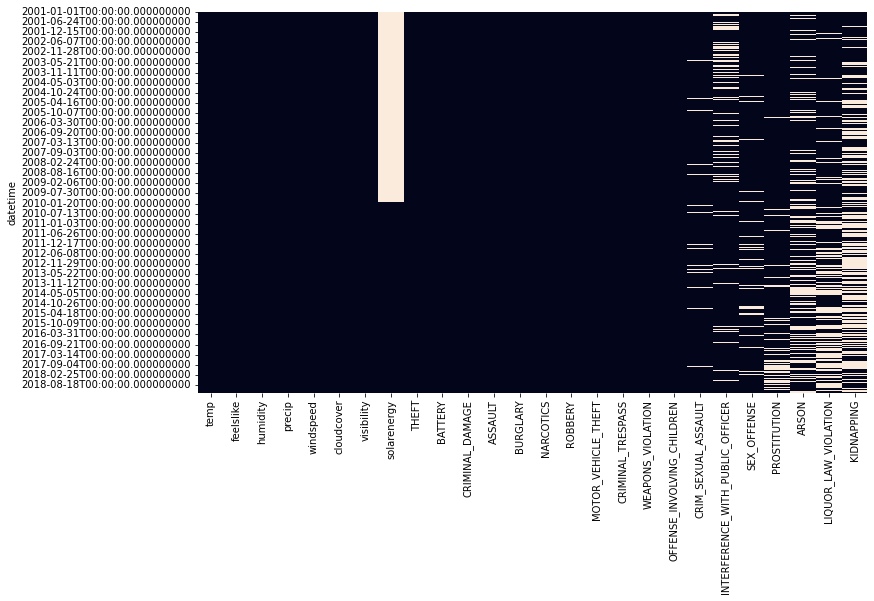

In [186]:


#결측값 시각화
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar=False)
#결과를 보면 태양에너지, 범죄 종류 8개의 열에 결측값 있음(그 시간대에 일어나지 않았다는 의미이으로 0을 대입)

In [187]:
#결측치 처리(비어있는 데이터 값을 모두 0으로)
df= df.fillna(0)
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,0.0,412,296,...,29,32.0,100.0,38.0,1.0,65.0,5.0,0.0,3.0,2.0
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,0.0,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,0.0,2.0,1.0
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,0.0,226,165,...,35,7.0,3.0,7.0,0.0,5.0,16.0,1.0,2.0,3.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,0.0,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,0.0,265,178,...,29,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,14,19.0,7.0,1.0,3.0,2.0,5.0,0.0,0.0,1.0
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,16,20.0,6.0,3.0,2.0,2.0,3.0,0.0,1.0,3.0
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,19,21.0,4.0,3.0,4.0,1.0,0.0,2.0,1.0,1.0


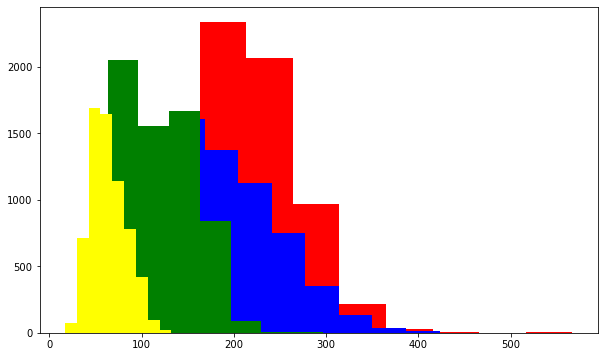

In [188]:
#데이터 시각화 > 
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.hist(df.THEFT, color='red')
plt.hist(df.BATTERY, color='blue')
plt.hist(df.CRIMINAL_DAMAGE, color='green')
plt.hist(df.ASSAULT, color='yellow')
plt.show()

In [189]:
df.columns

Index(['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION',
       'KIDNAPPING'],
      dtype='object')

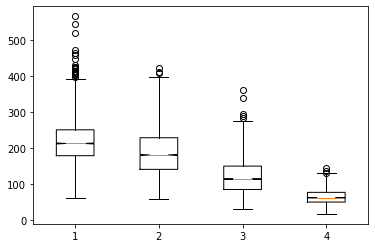

In [190]:
#이상값 시각화 >
plt.boxplot([df.THEFT, df.BATTERY, df.CRIMINAL_DAMAGE, df.ASSAULT], notch=True, whis=2.0)
plt.show()

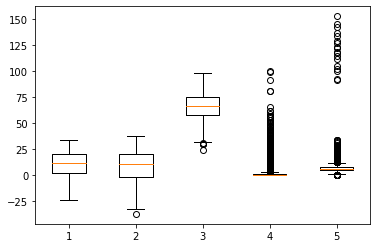

In [191]:
plt.boxplot([df.temp, df.feelslike, df.humidity, df.precip, df.OFFENSE_INVOLVING_CHILDREN])
plt.show()

In [192]:
# 이상값 처리 >

# import pandas as pd
# %matplotlib inline

# def delOutlier :
#     q1=df['OFFENSE_INVOLVING_CHILDREN'].quantile(0.1)
#     q3=df['OFFENSE_INVOLVING_CHILDREN'].quantile(0.9)
#     iqr=q3-q1

#     condition=df['OFFENSE_INVOLVING_CHILDREN']>q3+1.5*iqr
#     a=df[condition].index
#     df.drop(a,inplace=True)

# df.plot(kind='scatter',x='temp',y='OFFENSE_INVOLVING_CHILDREN')

In [193]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제

col = [ 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE',
       'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT',
       'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN',
       'CRIM_SEXUAL_ASSAULT', 'INTERFERENCE_WITH_PUBLIC_OFFICER',
       'SEX_OFFENSE', 'PROSTITUTION', 'ARSON',
       'LIQUOR_LAW_VIOLATION', 'KIDNAPPING', ]

for i in col :
    outlier_idx = get_outlier(df=df, column= i , weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

In [194]:
df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,0.0,221,143,...,35,9.0,4.0,2.0,1.0,4.0,11.0,0.0,2.0,1.0
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,0.0,243,173,...,29,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0
2001-01-08,-5.4,-11.2,71.8,0.000,21.5,54.4,16.0,0.0,244,192,...,36,5.0,9.0,3.0,1.0,6.0,12.0,3.0,5.0,1.0
2001-01-09,-7.4,-14.0,74.0,0.000,25.1,22.3,16.0,0.0,261,212,...,52,9.0,3.0,3.0,0.0,5.0,15.0,3.0,2.0,2.0
2001-01-11,-0.9,-4.2,75.0,0.000,14.3,68.3,14.2,0.0,257,222,...,37,14.0,4.0,4.0,2.0,5.0,25.0,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,-4.2,81.8,1.443,30.8,100.0,13.4,0.9,251,138,...,26,9.0,7.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0
2018-12-23,1.2,-3.5,69.3,0.000,35.3,91.6,14.9,4.5,147,138,...,22,9.0,6.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0
2018-12-24,-1.7,-5.4,61.5,0.000,24.0,54.8,16.0,6.4,162,107,...,11,7.0,8.0,3.0,2.0,5.0,0.0,3.0,0.0,0.0


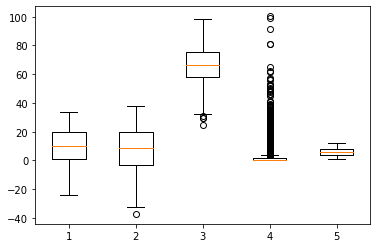

In [195]:
# 이상값 처리 후

plt.boxplot([df.temp, df.feelslike, df.humidity, df.precip, df.OFFENSE_INVOLVING_CHILDREN])
plt.show()

## Normalization

In [196]:
# MIN-MAX SCALING: 최솟값, 최대값을 이용해서 데이터의 크기를 0과 1 사이로 정규화
#변수의 크기가 상대적일 때, 해당 변수의 영향력이 제대로 표현되지 않을 수 있음

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

scaled_df = pd.DataFrame(scaled_df)

scaled_df.index = df.index
scaled_df.columns = df.columns

scaled_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,CRIMINAL_TRESPASS,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.219512,0.261682,0.771117,0.000000,0.192857,0.022,0.86250,0.000000,0.510638,0.280936,...,0.524590,0.421053,0.272727,0.222222,0.166667,0.444444,0.314286,0.000000,0.285714,0.5
2001-01-04,0.357143,0.379172,0.840599,0.000000,0.377143,0.986,0.63750,0.000000,0.588652,0.381271,...,0.426230,0.421053,0.363636,0.222222,0.500000,0.111111,0.542857,0.333333,0.571429,1.0
2001-01-08,0.320557,0.347130,0.641689,0.000000,0.192857,0.544,0.92500,0.000000,0.592199,0.444816,...,0.540984,0.210526,0.727273,0.333333,0.166667,0.666667,0.342857,1.000000,0.714286,0.5
2001-01-09,0.285714,0.309746,0.671662,0.000000,0.244286,0.223,0.92500,0.000000,0.652482,0.511706,...,0.803279,0.421053,0.181818,0.333333,0.000000,0.555556,0.428571,1.000000,0.285714,1.0
2001-01-11,0.398955,0.440587,0.685286,0.000000,0.090000,0.683,0.81250,0.000000,0.638298,0.545151,...,0.557377,0.684211,0.272727,0.444444,0.333333,0.555556,0.714286,0.666667,0.714286,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.433798,0.440587,0.777929,0.014385,0.325714,1.000,0.76250,0.027692,0.617021,0.264214,...,0.377049,0.421053,0.545455,0.333333,0.333333,0.222222,0.000000,0.666667,0.000000,0.0
2018-12-23,0.435540,0.449933,0.607629,0.000000,0.390000,0.916,0.85625,0.138462,0.248227,0.264214,...,0.311475,0.421053,0.454545,0.111111,0.333333,0.333333,0.000000,0.333333,0.000000,0.0
2018-12-24,0.385017,0.424566,0.501362,0.000000,0.228571,0.548,0.92500,0.196923,0.301418,0.160535,...,0.131148,0.315789,0.636364,0.333333,0.333333,0.555556,0.000000,1.000000,0.000000,0.0


In [197]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Datetime', 'weekday', 'month', 'day'],
      dtype='object')





## 6. 연관분석

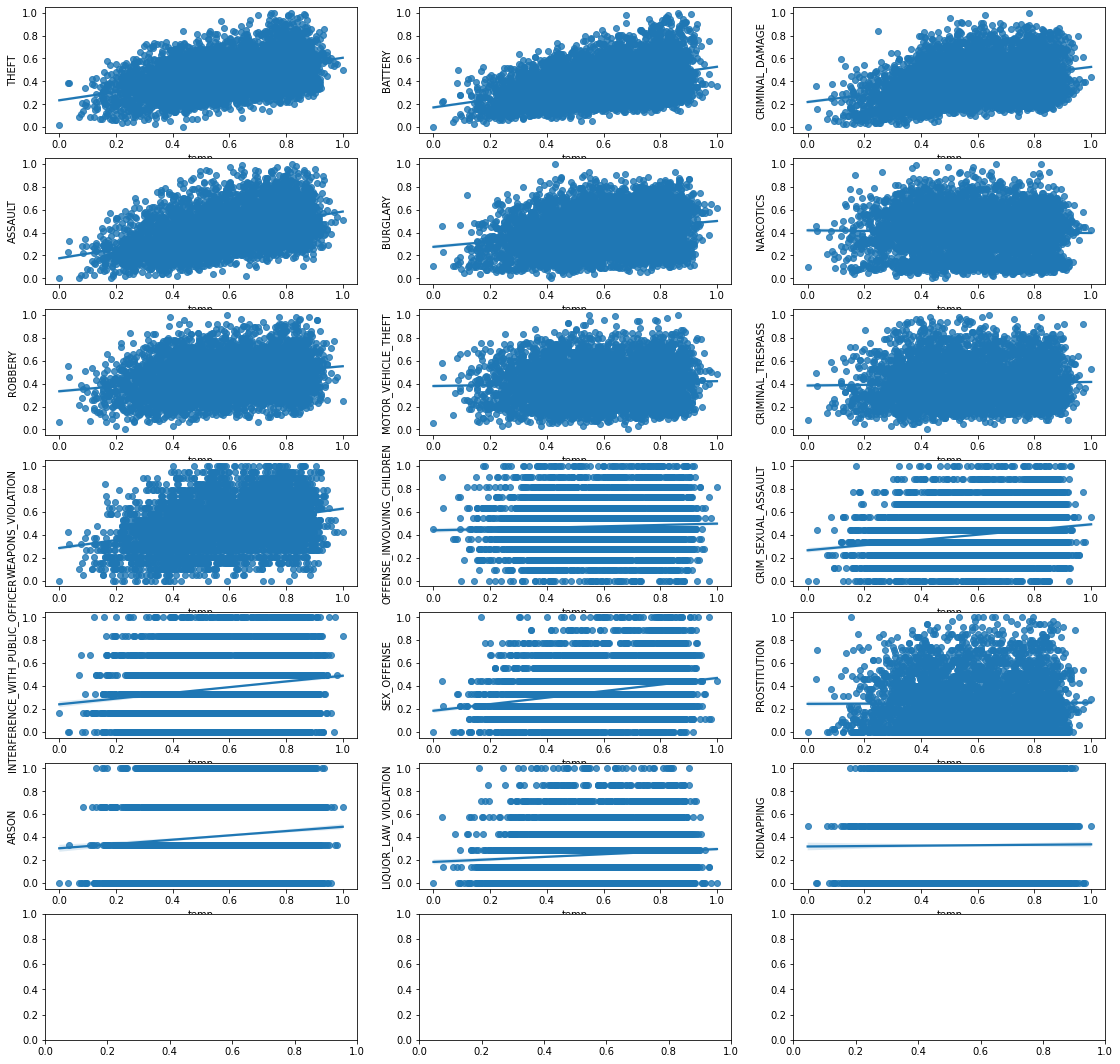

In [198]:
#회귀 분석 결과를 산점도 + 선형회귀 그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (19,19), ncols = 3, nrows = 7)

y_features = ['THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT', 'BURGLARY', 'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT', 
              'CRIMINAL_TRESPASS', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT', 
              'INTERFERENCE_WITH_PUBLIC_OFFICER', 'SEX_OFFENSE', 'PROSTITUTION', 'ARSON', 'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'
             ]

for i, feature in enumerate(y_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = 'temp', y = feature, data = scaled_df, ax = axs[row][col])

<AxesSubplot:>

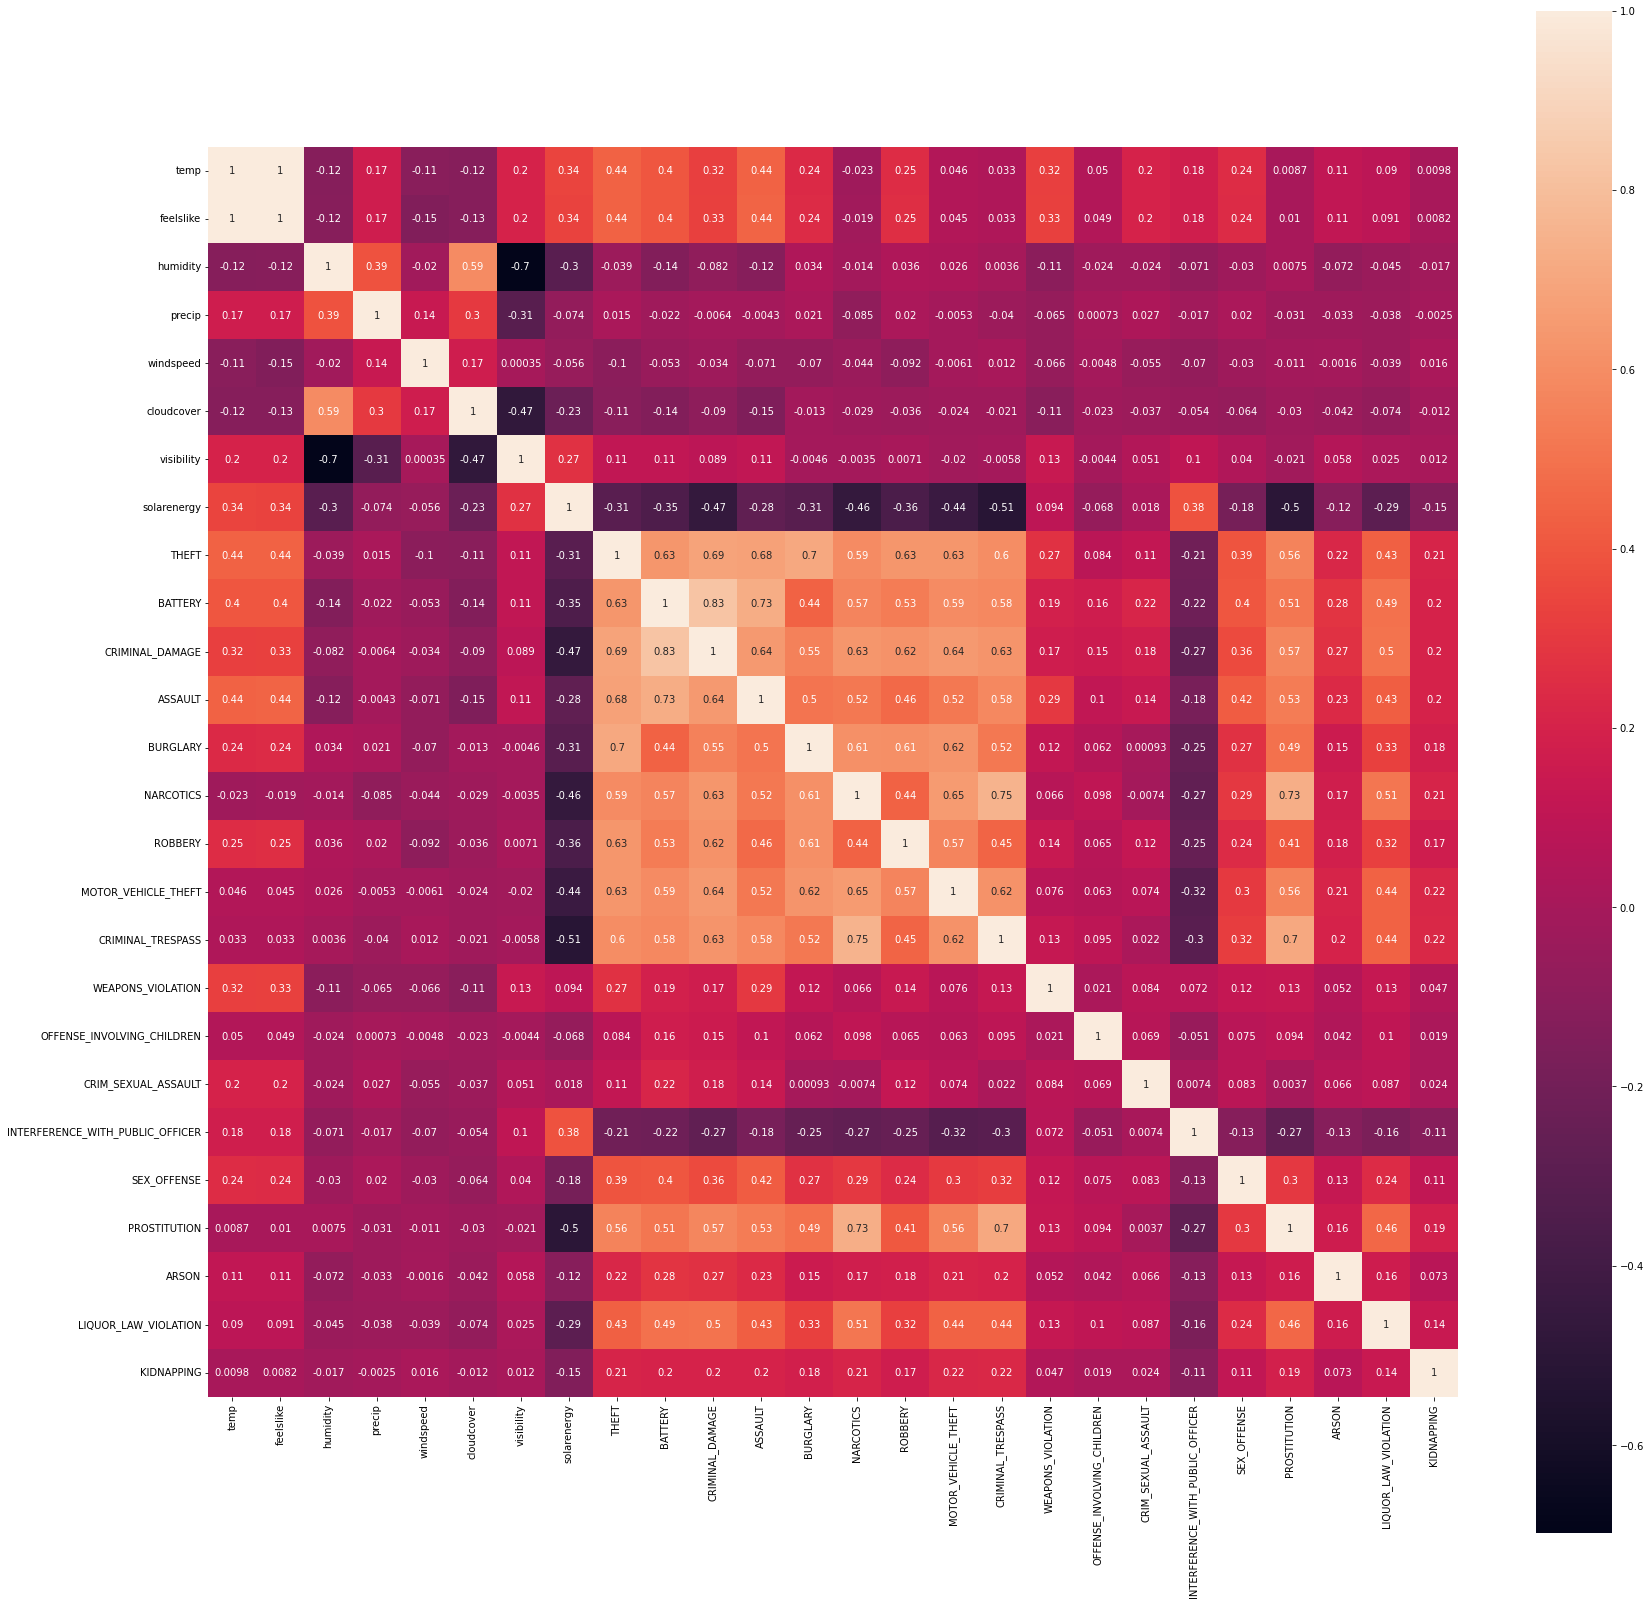

In [199]:
cor = scaled_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

## delete some unusable columns

in heatmap, there are some columns that have lower correlation ( -0.3 ~ 0.3 )
drop them.

furthermore,
'INTERFERENCE_WITH_PUBLIC_OFFICER' column has high correlation with only 'solarenergy' column, because most of the working time is during the day. So, drop it.

also,
'feelslike' columns has very high correlation with temp. so drop it, too.

In [200]:
scaled_df.drop(['feelslike', 'INTERFERENCE_WITH_PUBLIC_OFFICER', 'BURGLARY', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT' , 'SEX_OFFENSE', 
                'ARSON',  'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'],axis=1, inplace=True)
df.drop(['feelslike', 'INTERFERENCE_WITH_PUBLIC_OFFICER', 'BURGLARY', 'WEAPONS_VIOLATION', 'OFFENSE_INVOLVING_CHILDREN', 'CRIM_SEXUAL_ASSAULT' , 'SEX_OFFENSE', 
                'ARSON',  'LIQUOR_LAW_VIOLATION', 'KIDNAPPING'],axis=1, inplace=True)

In [201]:
scaled_df.columns

Index(['temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility',
       'solarenergy', 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT',
       'NARCOTICS', 'ROBBERY', 'MOTOR_VEHICLE_THEFT', 'CRIMINAL_TRESPASS',
       'PROSTITUTION'],
      dtype='object')

<AxesSubplot:>

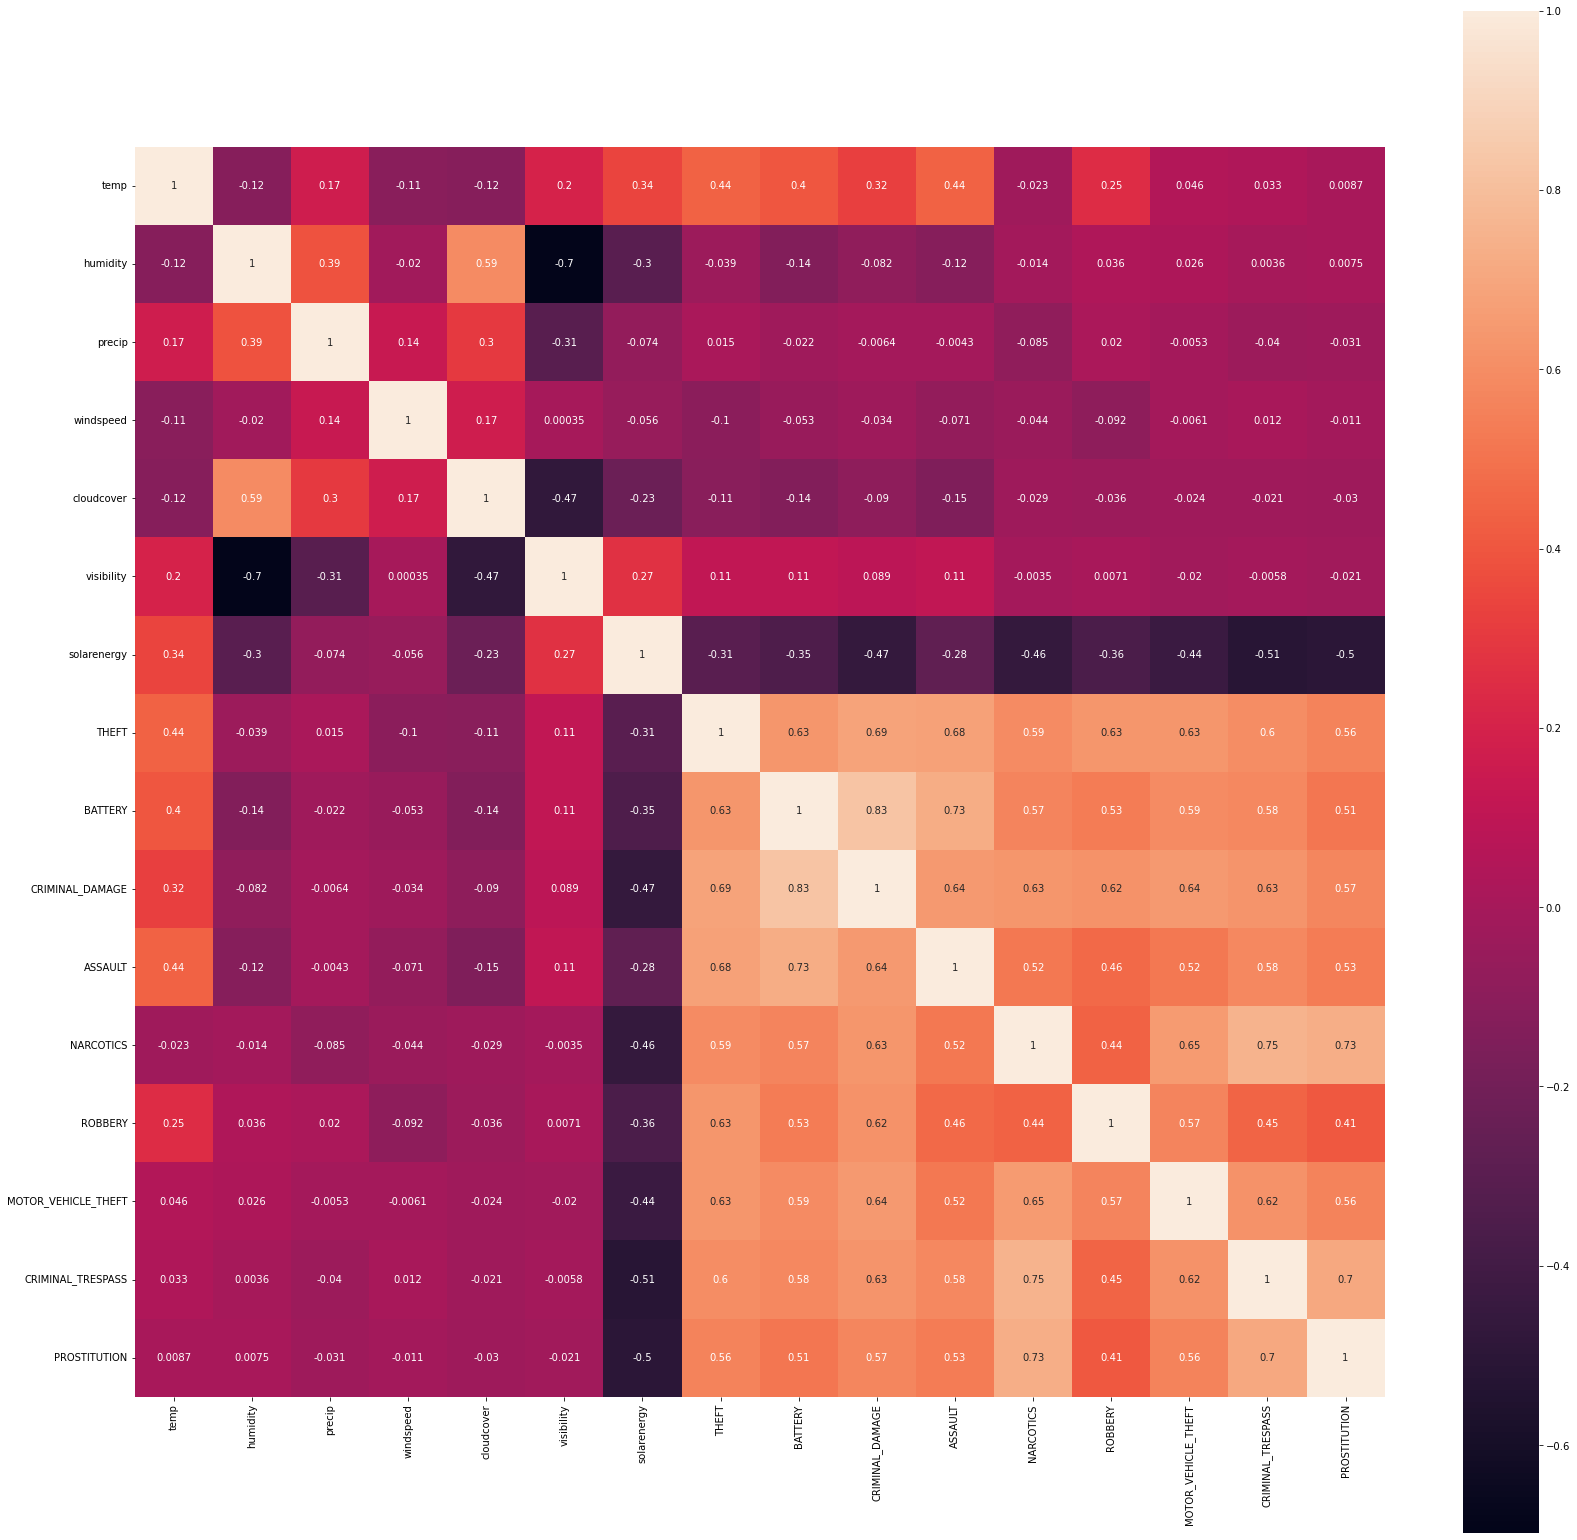

In [202]:
cor = scaled_df.corr()
plt.figure(figsize=(28,28))
sns.heatmap(cor, vmax=1,square=True,annot=True)

Given that most crimes take place at night when there's no 'solarenergy',
only 'THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT' column have high correlation with temperature ( >= 0.3 )

In [203]:
# from sklearn.model_selection import train_test_split
# import sklearn
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# X=scaled_df[['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'cloudcover',
#        'visibility', 'solarenergy']]
# y=scaled_df['ASSAULT']

# ## LinearRegression 클래스 생성
# lr = LinearRegression() ## 절편항 있는 회귀 모형, False 절편항 제외
# lr.fit(X, y) ## 모형 적합
# lr.score(X, y)

In [204]:
THEFT

Date
2001-01-01    412
2001-01-02    221
2001-01-03    226
2001-01-04    243
2001-01-05    265
             ... 
2022-11-10    154
2022-11-11    193
2022-11-12    143
2022-11-13    124
2022-11-14    119
Name: Primary Type, Length: 7988, dtype: int64

In [205]:
# 전체 범죄의 개수 시각화

plt.figure(figsize=(12,6))
dfr = pd.DataFrame({'THEFT':THEFT/float(THEFT.max()),
                    'BATTERY':BATTERY/float(BATTERY.max()),
                    'CRIMINAL_DAMAGE':CRIMINAL_DAMAGE/float(CRIMINAL_DAMAGE.max()),
                    'ASSAULT':ASSAULT/float(ASSAULT.max())
                    })

# max scaling을 해줘서 0-1 사이의 값으로 맞춰준 것 같음

# daily = dfr.resample('d')  #Datetime Index를 day 기준으로 나누어주는 메소드 - daily plot을 불러오는 데 시간이 너무 많이 소요되며, 과적합 발생
# daily.plot()

<Figure size 864x432 with 0 Axes>

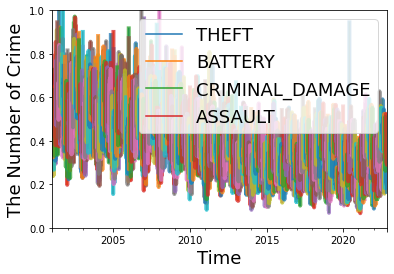

In [206]:
monthly = dfr.resample('M')  #Datetime Index를 month 기준으로 나누어주는 메소드 
dfr
monthly.plot()

ax = monthly.plot(lw=4,alpha=.75) 
plt.xlabel('Time',fontsize=18)
plt.ylabel('The Number of Crime',fontsize=18)
plt.ylim((0,1))
plt.legend(['THEFT', 'BATTERY', 'CRIMINAL_DAMAGE', 'ASSAULT' ], loc='upper right', fontsize=18)

#온도와 연관성이 높은 네가지 범죄의 변화 추이를 현재까지 시각화 한 자료인데... 굳이 필요할까 싶음 그냥 하락세를 보인다 정도만 보여서!

In [207]:
df

,temp,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,CRIMINAL_DAMAGE,ASSAULT,NARCOTICS,ROBBERY,MOTOR_VEHICLE_THEFT,CRIMINAL_TRESPASS,PROSTITUTION
datetime,,,,,,,,,,,,,,,,
2001-01-02,-11.2,81.3,0.000,21.5,2.2,15.0,0.0,221,143,118,66,175,35,65,35,11.0
2001-01-04,-3.3,86.4,0.000,34.4,98.6,11.4,0.0,243,173,133,57,142,55,87,29,19.0
2001-01-08,-5.4,71.8,0.000,21.5,54.4,16.0,0.0,244,192,104,67,161,44,62,36,12.0
2001-01-09,-7.4,74.0,0.000,25.1,22.3,16.0,0.0,261,212,120,63,115,38,65,52,15.0
2001-01-11,-0.9,75.0,0.000,14.3,68.3,14.2,0.0,257,222,111,89,160,34,59,37,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1.1,81.8,1.443,30.8,100.0,13.4,0.9,251,138,64,51,30,32,26,26,0.0
2018-12-23,1.2,69.3,0.000,35.3,91.6,14.9,4.5,147,138,87,46,25,29,27,22,0.0
2018-12-24,-1.7,61.5,0.000,24.0,54.8,16.0,6.4,162,107,65,51,16,25,19,11,0.0


## 시계열 분석 및 예측

In [208]:
origin_df['Date'] = origin_df.index
origin_df

,temp,feelslike,humidity,precip,windspeed,cloudcover,visibility,solarenergy,THEFT,BATTERY,...,WEAPONS_VIOLATION,OFFENSE_INVOLVING_CHILDREN,CRIM_SEXUAL_ASSAULT,INTERFERENCE_WITH_PUBLIC_OFFICER,SEX_OFFENSE,PROSTITUTION,ARSON,LIQUOR_LAW_VIOLATION,KIDNAPPING,Date
datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-7.6,-12.7,76.0,0.000,20.9,50.2,15.5,NaN,412,296,...,32.0,100.0,38.0,1.0,65.0,5.0,NaN,3.0,2.0,2001-01-01
2001-01-02,-11.2,-17.6,81.3,0.000,21.5,2.2,15.0,NaN,221,143,...,9.0,4.0,2.0,1.0,4.0,11.0,NaN,2.0,1.0,2001-01-02
2001-01-03,-6.2,-13.0,86.5,0.000,26.9,93.5,7.4,NaN,226,165,...,7.0,3.0,7.0,NaN,5.0,16.0,1.0,2.0,3.0,2001-01-03
2001-01-04,-3.3,-8.8,86.4,0.000,34.4,98.6,11.4,NaN,243,173,...,9.0,5.0,2.0,3.0,1.0,19.0,1.0,4.0,2.0,2001-01-04
2001-01-05,0.5,-4.8,71.2,6.069,33.5,43.0,15.5,NaN,265,178,...,6.0,9.0,6.0,2.0,2.0,16.0,3.0,8.0,3.0,2001-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,7.5,4.3,82.0,14.123,34.9,99.6,13.6,0.7,171,92,...,19.0,7.0,1.0,3.0,2.0,5.0,NaN,NaN,1.0,2018-12-27
2018-12-28,3.1,-1.6,83.0,0.575,38.0,98.9,13.6,1.9,187,119,...,20.0,6.0,3.0,2.0,2.0,3.0,NaN,1.0,3.0,2018-12-28
2018-12-29,-1.9,-5.8,86.3,0.628,25.7,100.0,11.8,0.8,145,142,...,21.0,4.0,3.0,4.0,1.0,NaN,2.0,1.0,1.0,2018-12-29


In [209]:
origin_df['Time'] = range((max(df.index)-min(df.index)).days+1)

origin_df['Weekday'] = origin_df['Date'].apply(lambda x:x.weekday())
origin_df['Hour'] = origin_df['Date'].apply(lambda x:x.hour)
origin_df['Week'] = origin_df['Date'].apply(lambda x:x.week)
origin_df['Month'] = origin_df['Date'].apply(lambda x:x.month)
origin_df['Year'] = origin_df['Date'].apply(lambda x:x.year)
origin_df['Weekend'] = origin_df['Weekday'].isin([5,6]).astype(int)

ValueError: Length of values (6572) does not match length of index (6574)

In [ ]:
# import statsmodels.formula.api as smf
# from scipy.optimize import curve_fit

# def sinfunc(x,a,b,c):
#     return a*np.sin(2*np.pi/365.*x+b)+c
# y2001 = np.array(origin_df['temp']['2001-1-1':'2001-12-31'])
# x = np.arange(len(y2001))
# fitpars,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y2001)

# for y in range(2001,2015):
#     y_i = np.array(origin_df['temp']['{0}-1-1'.format(y):'{0}-12-31'.format(y)])
#     y_i = np.nan_to_num(y_i)
#     x = np.arange(len(y_i))
#     try:
#         fitpars_i,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y_i)
#     except RuntimeError:
#         print ("Couldn't find estimates for {0}".format(y))
#         pass
#     fitpars = np.vstack([fitpars,fitpars_i])
    
# avg_params = fitpars.mean(axis=0)

# lm_personal = smf.ols('THEFT ~ temp + Time +C(Week) + C(Weekday)',data=origin_df.dropna()).fit()

# lm_personal_x = pd.DataFrame({'Date':pd.date_range('2001-01-01','2021-12-31')})
# lm_personal_x['temp'] = sinfunc(np.arange(len(lm_personal_x)),*avg_params)
# lm_personal_x['Month'] = lm_personal_x['Date'].apply(lambda x:x.month)
# lm_personal_x['Week'] = lm_personal_x['Date'].apply(lambda x:x.week)
# lm_personal_x['Weekday'] = lm_personal_x['Date'].apply(lambda x:x.weekday())
# lm_personal_x['Time'] = np.arange(len(lm_personal_x))
# lm_personal_x = lm_personal_x.set_index('Date')

# # std,lower,upper = wls_prediction_std(lm_personal)

# start_date = '2001-01-01'
# personal_pred = pd.DataFrame(index = pd.date_range(start_date,'2021-12-31'))
# personal_pred['Predictions'] = lm_personal.predict(lm_personal_x[start_date:])
# personal_pred['Observations'] = origin_df['Personal'].loc[start_date:]